In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
train = pd.read_csv('Consumer_Complaints_train.csv')
test = pd.read_csv('Consumer_Complaints_test.csv')

In [ ]:
print(train.dtypes)

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object


In [ ]:
print(test.dtypes)

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object


In [ ]:
train.shape

(358810, 18)

In [ ]:
test.shape

(119606, 17)

In [ ]:
train.isna().sum()

Date received                        0
Product                              0
Sub-product                     103786
Issue                                0
Sub-issue                       219374
Consumer complaint narrative    302630
Company public response         290879
Company                              0
State                             2903
ZIP code                          2911
Tags                            308584
Consumer consent provided?      257230
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

In [ ]:
test.isna().sum()

Date received                        0
Product                              0
Sub-product                      34683
Issue                                0
Sub-issue                        73250
Consumer complaint narrative    100692
Company public response          97146
Company                              0
State                              936
ZIP code                           937
Tags                            102629
Consumer consent provided?       85699
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Complaint ID                         0
dtype: int64

In [ ]:
train = train.loc[:, train.isnull().mean() <= 0.25]
test = test.loc[:, test.isnull().mean() <= 0.25]

In [ ]:
train.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [ ]:
test.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667


In [ ]:
train.shape

(358810, 12)

In [ ]:
test.shape

(119606, 11)

In [ ]:
train['Date sent to company'] = pd.to_datetime(train['Date sent to company'])
train['Date received'] = pd.to_datetime(train['Date received'])
test['Date sent to company'] = pd.to_datetime(test['Date sent to company'])
test['Date received'] = pd.to_datetime(test['Date received'])

# Calculate the difference in days
train['Days_held'] = (train['Date received'] - train['Date sent to company']).dt.days
test['Days_held'] = (test['Date received'] - test['Date sent to company']).dt.days

In [ ]:
train['Day_received'] = train['Date received'].dt.day
train['Month_received'] = train['Date received'].dt.month
train['Year_received'] = train['Date received'].dt.year

test['Day_received'] = test['Date received'].dt.day
test['Month_received'] = test['Date received'].dt.month
test['Year_received'] = test['Date received'].dt.year

In [ ]:
train.drop(['Date sent to company', 'ZIP code', 'Complaint ID'], axis=1, inplace=True)
test.drop([ 'Date sent to company', 'ZIP code', 'Complaint ID'], axis=1, inplace=True)

In [ ]:
mode_state = train['State'].mode()[0]
train['State'].fillna(mode_state, inplace=True)
test['State'].fillna(mode_state, inplace=True)

In [ ]:
df = pd.concat([train, test], axis=0)
df['Week_Received'] = df['Date received'].dt.isocalendar().week
train = df.iloc[:train.shape[0], :]
test = df.iloc[train.shape[0]:, :]

In [ ]:
test = test.drop('Consumer disputed?', axis=1)

In [ ]:
disputed_cons = train[train['Consumer disputed?'] == 'Yes']

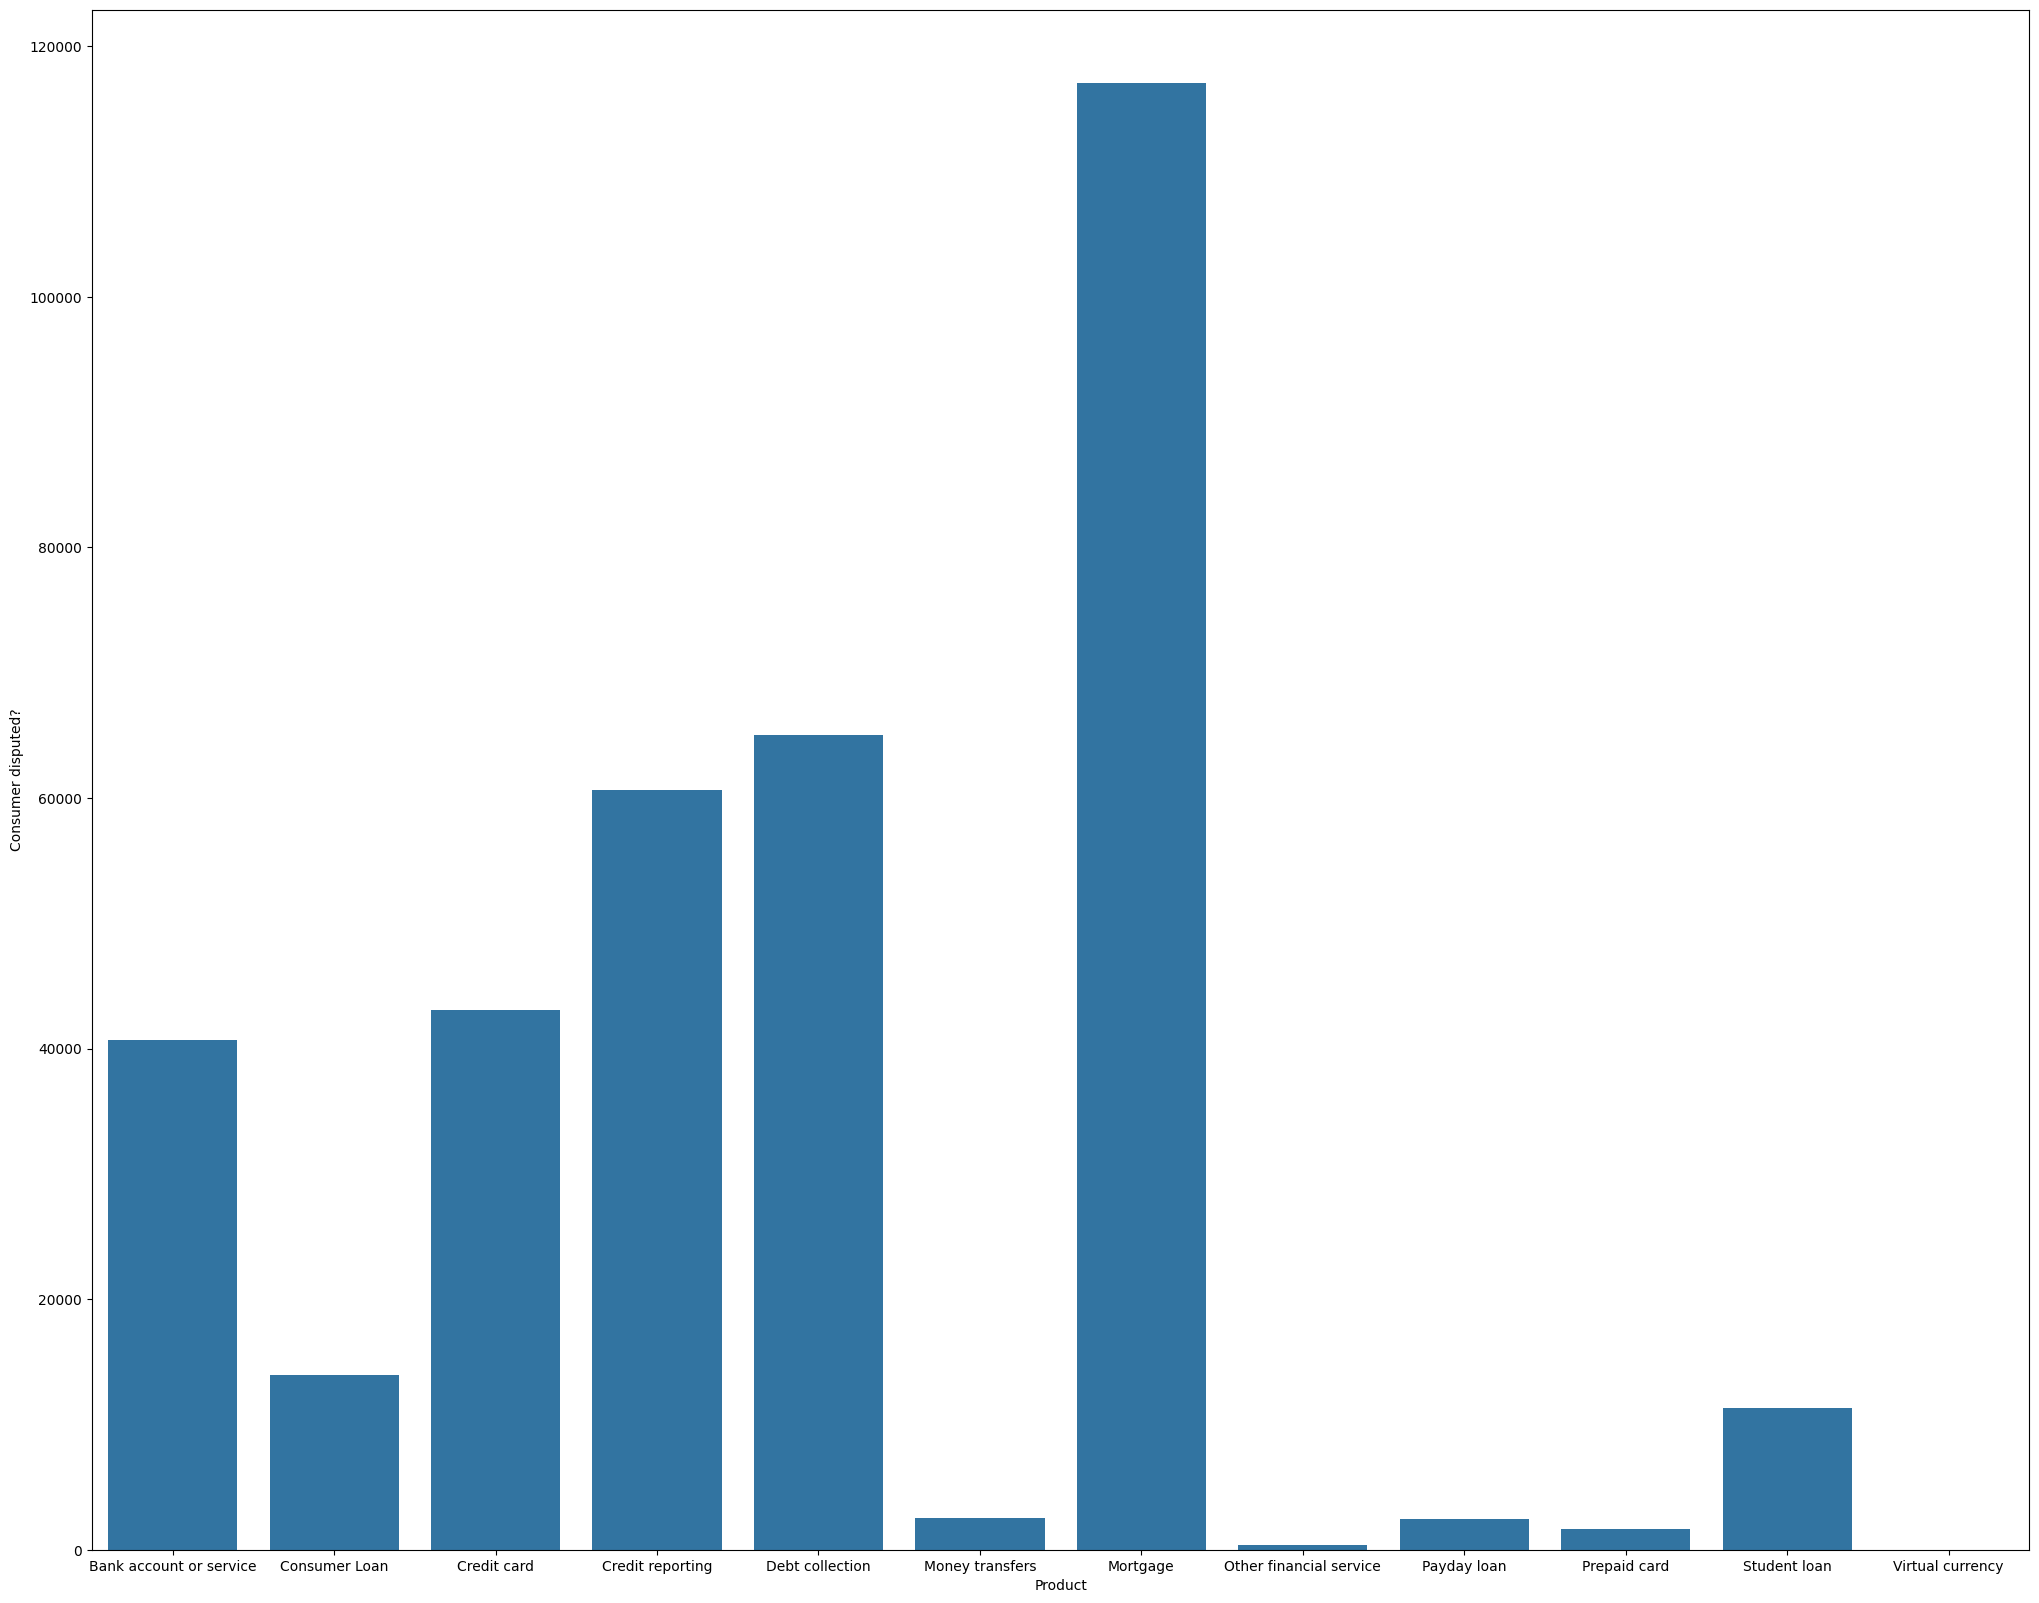

In [ ]:
fig, ax = plt.subplots(figsize = (25,20))

data_group_1 = train.groupby(['Product'])['Consumer disputed?'].count().reset_index()

sns.barplot(x='Product', y='Consumer disputed?', data=data_group_1, ax=ax)
plt.show()

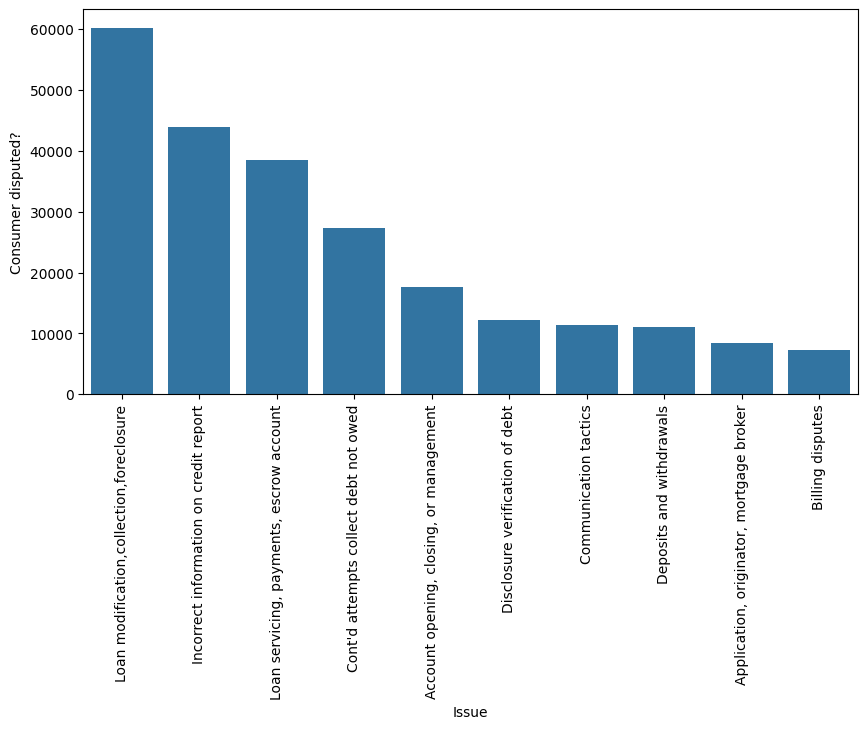

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
ax.tick_params(axis='x', rotation=90)
data_group_2 = train.groupby(['Issue'])['Consumer disputed?'].count().reset_index()
data_group_2 = data_group_2.nlargest(10, columns=['Consumer disputed?'])

sns.barplot(x='Issue', y='Consumer disputed?', data=data_group_2, ax=ax)
plt.show()

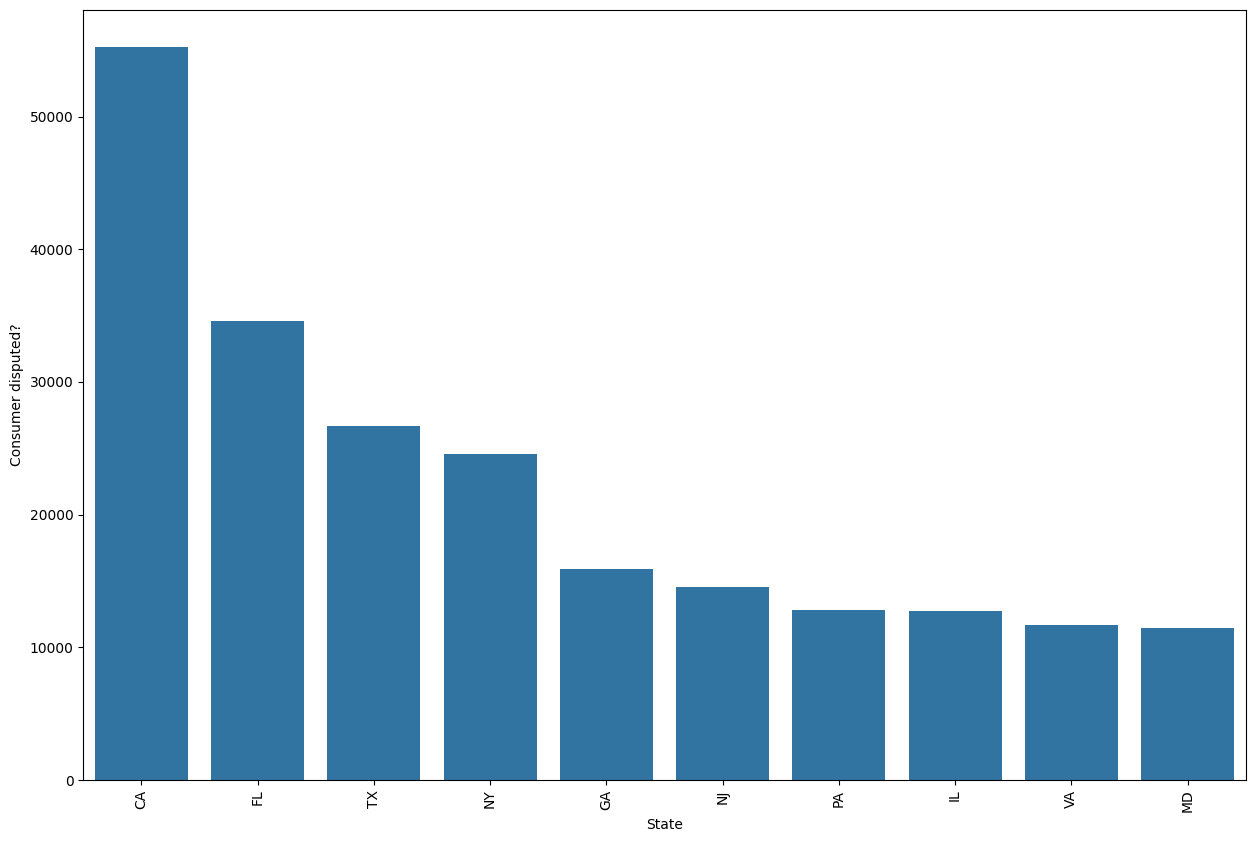

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax.tick_params(axis='x', rotation=90)
data_group_3 = train.groupby(['State'])['Consumer disputed?'].count().reset_index()
data_group_3 = data_group_3.nlargest(10, columns=['Consumer disputed?'])

sns.barplot(x='State', y='Consumer disputed?', data=data_group_3, ax=ax)
plt.show()

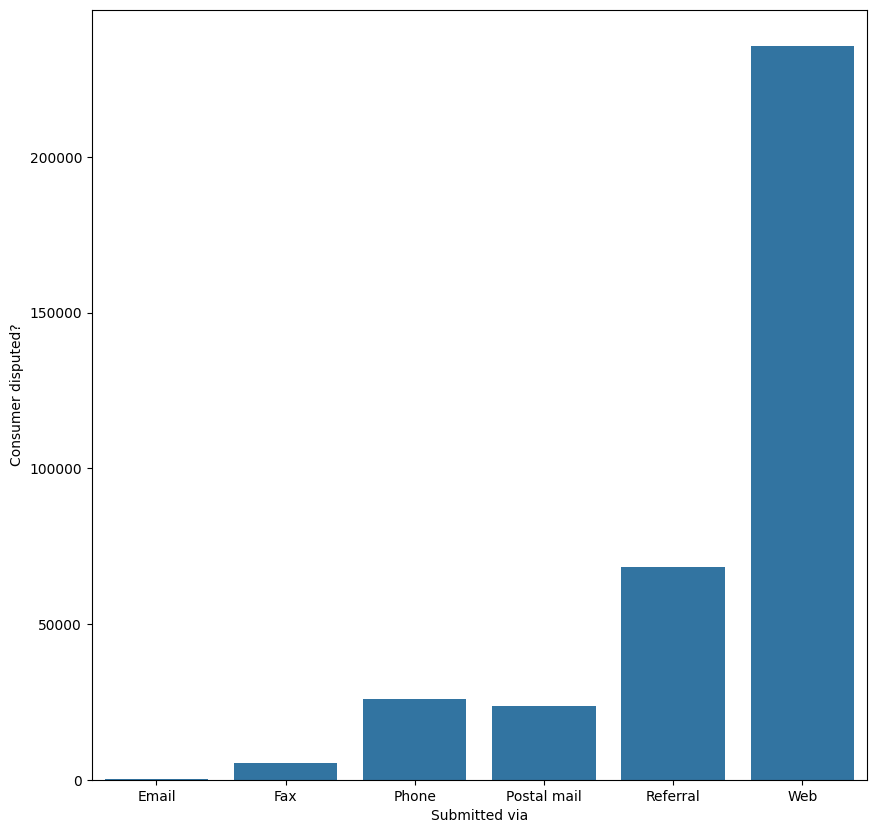

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))

data_group_4 = train.groupby(['Submitted via'])['Consumer disputed?'].count().reset_index()

sns.barplot(x='Submitted via', y='Consumer disputed?', data=data_group_4, ax=ax)
plt.show()

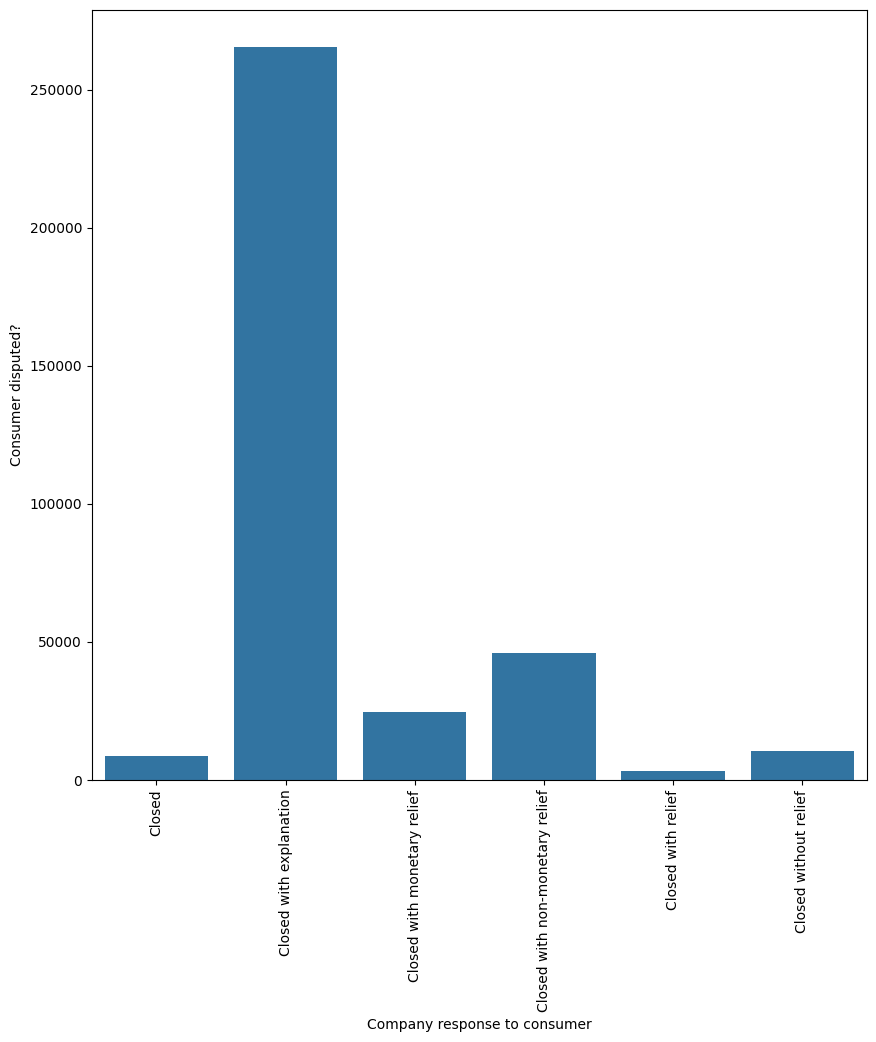

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
ax.tick_params(axis='x', rotation=90)
data_group_5 = train.groupby(['Company response to consumer'])['Consumer disputed?'].count().reset_index()

sns.barplot(x='Company response to consumer', y='Consumer disputed?', data=data_group_5, ax=ax)
plt.show()

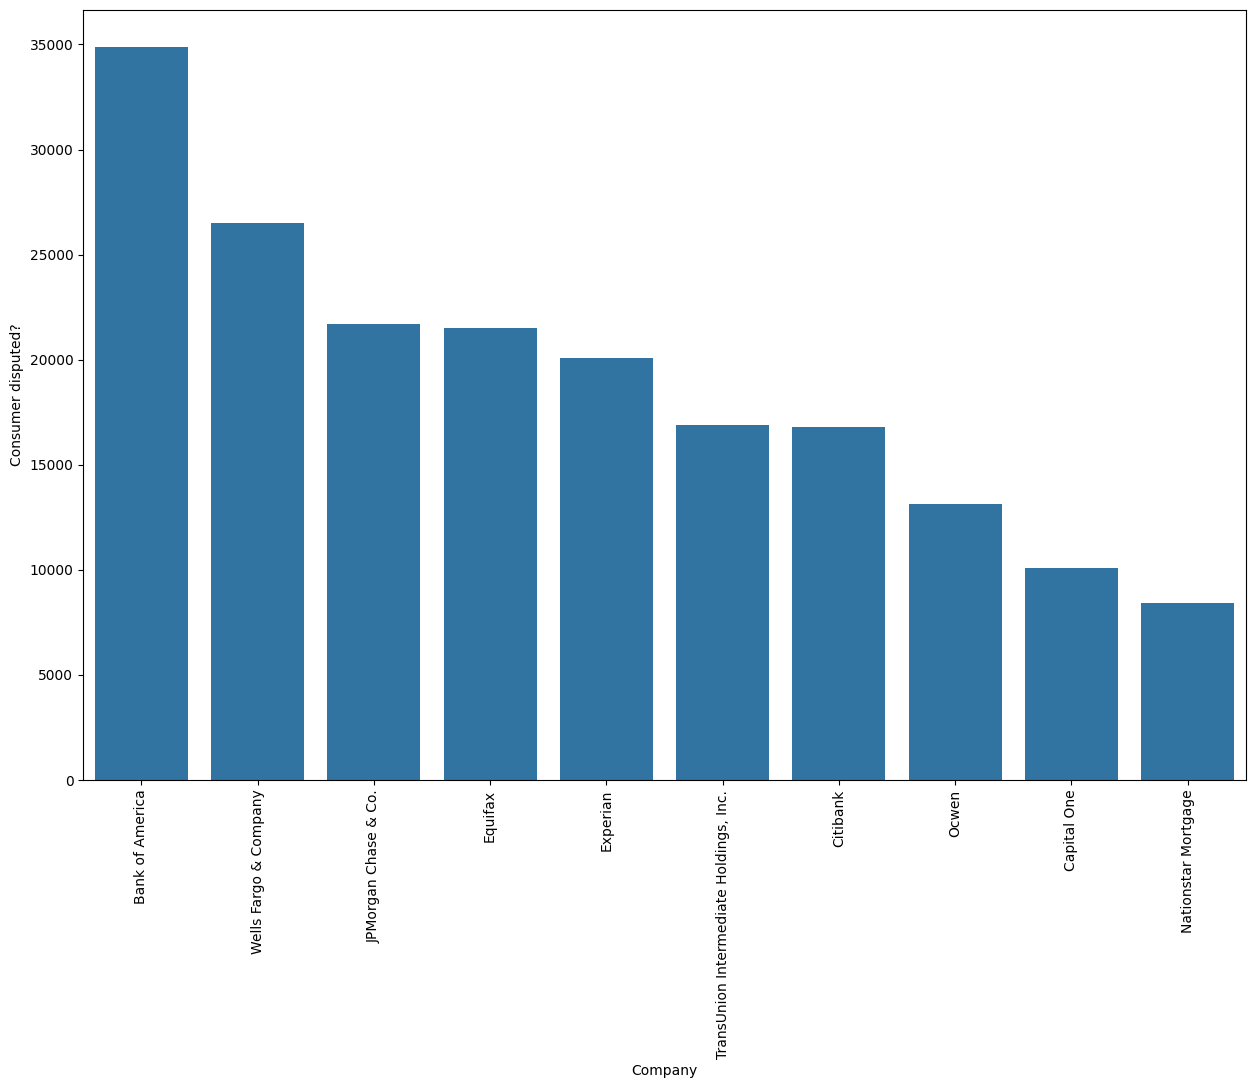

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax.tick_params(axis='x', rotation=90)
data_group_6 = train.groupby(['Company'])['Consumer disputed?'].count().reset_index()
data_group_6 = data_group_6.nlargest(10, columns=['Consumer disputed?'])

sns.barplot(x='Company', y='Consumer disputed?', data=data_group_6, ax=ax)
plt.show()

In [ ]:
train['Days_held'] = train['Days_held'].clip(lower=0)
test['Days_held'] = test['Days_held'].clip(lower=0)

<ipython-input-29-0ca4271f6324>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Days_held'] = train['Days_held'].clip(lower=0)


In [ ]:
train.drop(['Date received','Company', 'State', 'Year_received', 'Days_held'], axis=1, inplace=True)
test.drop(['Date received','Company', 'State', 'Year_received', 'Days_held'], axis=1, inplace=True)

<ipython-input-30-cb4d0f2fd1da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['Date received','Company', 'State', 'Year_received', 'Days_held'], axis=1, inplace=True)


In [ ]:
train['Consumer disputed?'] = train['Consumer disputed?'].map({'Yes': 1, 'No': 0})

<ipython-input-31-4c5765f65dce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Consumer disputed?'] = train['Consumer disputed?'].map({'Yes': 1, 'No': 0})


In [ ]:
train.shape

(358810, 118)

In [ ]:
test.shape

(119606, 117)

In [ ]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [ ]:
train = train.drop(['Issue_Lender damaged or destroyed property','Issue_Lender sold the property'],axis=1)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train.drop('Consumer disputed?', axis=1))
y_train = train['Consumer disputed?']
X_test = scaler.transform(test)

In [ ]:
pca = PCA(n_components=0.8)
X_train = pca.fit_transform(X_train)

In [ ]:
X_train

array([[-2.01548379e+00,  7.33145353e-01, -2.37421481e+00, ...,
        -5.27988547e-03, -8.67301679e-03, -1.00417629e-02],
       [-8.74753991e-02, -1.54766307e-01,  2.35922832e-01, ...,
         2.00653528e-02,  3.02673601e-02,  3.13868208e-02],
       [-4.10514775e-01,  2.33116996e+00,  2.16169180e+00, ...,
        -8.75680607e-02,  6.51568393e-02,  1.10778988e-02],
       ...,
       [-7.02747056e-01,  2.38056305e+00,  2.69248331e+00, ...,
        -1.42160365e-01,  2.32173033e-01, -2.07319915e-01],
       [-1.61027004e+00, -1.25738701e+00,  1.20229118e+00, ...,
        -4.38174940e-04,  1.58118840e-02,  1.19287836e-02],
       [-5.71811240e-01,  1.58238008e+00, -2.41781940e+00, ...,
        -9.67775833e-03, -1.11408115e-02, -1.21858320e-02]])

In [ ]:
X_test = pca.transform(X_test)

In [ ]:
X_test

array([[-8.01313003e-01,  3.15007592e+00,  3.70629940e+00, ...,
        -1.63660007e-01,  5.99562693e-03, -5.24332650e-02],
       [ 2.68205611e-02, -1.00505737e+00,  9.60780296e-01, ...,
        -1.04274665e+00, -5.15822571e+00, -1.40857465e+00],
       [-5.53776149e-01,  1.23241691e+00,  2.26229733e+00, ...,
         6.22659179e-02,  7.07630780e-01, -1.85288815e-01],
       ...,
       [ 3.43700270e+00,  1.31461447e+00, -1.55504376e-01, ...,
         1.56163653e-02,  1.50786527e-02,  1.02997981e-02],
       [-1.91994043e+00,  9.09584080e-01, -2.40997280e+00, ...,
        -6.90951983e-06, -2.76083228e-03, -1.19084799e-02],
       [-1.35322132e+00, -2.45561866e+00,  7.47637037e-01, ...,
        -7.69065181e-03, -5.45791019e-02,  1.42210974e-02]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
xgb = XGBClassifier(n_estimators = 50)

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rfc.fit(X_train, y_train)
abc.fit(X_train, y_train)
gbc.fit(X_train, y_train)
knn.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score

lr_pred = lr.predict(X_val)
print('Logistic Regression accuracy : ',accuracy_score(y_val,lr_pred))

dt_pred = dt.predict(X_val)
print('Decision Tree Classifier accuracy : ',accuracy_score(y_val,dt_pred))

rfc_pred = rfc.predict(X_val)
print('Random Forest Classifier accuracy : ',accuracy_score(y_val,rfc_pred))

abc_pred = abc.predict(X_val)
print('Ada Boost Classifier accuracy : ',accuracy_score(y_val,abc_pred))

gbc_pred = gbc.predict(X_val)
print('Gradient Boosting Classifier accuracy : ',accuracy_score(y_val,gbc_pred))

knn_pred = knn.predict(X_val)
print('KNeighbors Classifier accuracy : ',accuracy_score(y_val,knn_pred))

xgb_pred = xgb.predict(X_val)
print('XGB Classifier accuracy : ',accuracy_score(y_val,xgb_pred))

Logistic Regression accuracy :  0.7878124912906552
Decision Tree Classifier accuracy :  0.750787324767983
Random Forest Classifier accuracy :  0.7568350937822246
Ada Boost Classifier accuracy :  0.7878403611939466
Gradient Boosting Classifier accuracy :  0.7878124912906552
KNeighbors Classifier accuracy :  0.7513168529305203
XGB Classifier accuracy :  0.7878542961455923


In [ ]:
# Select the best-performing model
best_model = XGBClassifier()

# Train the best model on the entire train data
best_model.fit(X_train, y_train)

# Predict the outcome for the test data
test_predictions = best_model.predict(X_test)

# Fill the dispute column in the test data with the predicted values
test['Consumer disputed?'] = test_predictions

# Save the updated test data with predictions
test.to_excel("test_data_predictions.xlsx", index=False)
